In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

In [77]:
headlines1 = pd.read_json('./datasets/Sarcasm_Headlines_Dataset.json',lines=True)
headlines2 = pd.read_json('./datasets/Sarcasm_Headlines_Dataset_v2.json', lines=True)
headlines = pd.concat([headlines1,headlines2])

In [78]:
headlines.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [79]:
headlines

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
28614,https://www.theonion.com/jews-to-celebrate-ros...,jews to celebrate rosh hashasha or something,1
28615,https://local.theonion.com/internal-affairs-in...,internal affairs investigator disappointed con...,1
28616,https://www.huffingtonpost.com/entry/andrew-ah...,the most beautiful acceptance speech this week...,0
28617,https://www.theonion.com/mars-probe-destroyed-...,mars probe destroyed by orbiting spielberg-gat...,1


In [80]:
headlines.drop("article_link", axis=1, inplace=True)

In [81]:
headlines.rename(columns={"headline":"text"}, inplace=True)

In [82]:
headlines.head()

,text,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [83]:
tweets = pd.read_csv("hf://datasets/nikesh66/Sarcasm-dataset/sarcasm_tweets.csv")

In [84]:
tweets.describe()

,Tweet,Sarcasm (yes/no)
count,5000,5000
unique,240,2
top,Can't wait for more of artists.,yes
freq,49,2521


In [85]:
tweets

,Tweet,Sarcasm (yes/no)
0,I genuinely love musicians.,no
1,I find vegetarians to be wonderful.,no
2,Because artists really make everything better.,yes
3,Can't wait for more of the game.,yes
4,"Oh great, another artists. Just what I needed.",yes
...,...,...
4995,Because musicians really make everything better.,yes
4996,Can't wait for more of musicians.,no
4997,I am always excited for this book.,no
4998,I find the concert to be wonderful.,no


In [86]:
tweets[tweets["Sarcasm (yes/no)"]== "no"]

,Tweet,Sarcasm (yes/no)
0,I genuinely love musicians.,no
1,I find vegetarians to be wonderful.,no
9,I am always excited for the workshop.,no
11,Had a great time with the conference.,no
13,this movie are truly inspiring.,no
...,...,...
4991,artists are genuinely amazing.,no
4996,Can't wait for more of musicians.,no
4997,I am always excited for this book.,no
4998,I find the concert to be wonderful.,no


In [87]:
tweets['is_sarcastic'] = tweets['Sarcasm (yes/no)'].apply(lambda x: 1 if x.strip().lower() == "yes" else 0)

In [88]:
tweets.head()

,Tweet,Sarcasm (yes/no),is_sarcastic
0,I genuinely love musicians.,no,0
1,I find vegetarians to be wonderful.,no,0
2,Because artists really make everything better.,yes,1
3,Can't wait for more of the game.,yes,1
4,"Oh great, another artists. Just what I needed.",yes,1


In [89]:
tweets.drop("Sarcasm (yes/no)", axis=1, inplace=True)

In [90]:
tweets.rename(columns={"Tweet":"text"}, inplace=True)

In [91]:
tweets.head()

,text,is_sarcastic
0,I genuinely love musicians.,0
1,I find vegetarians to be wonderful.,0
2,Because artists really make everything better.,1
3,Can't wait for more of the game.,1
4,"Oh great, another artists. Just what I needed.",1


In [92]:
data = headlines

In [93]:
data

,text,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
28614,jews to celebrate rosh hashasha or something,1
28615,internal affairs investigator disappointed con...,1
28616,the most beautiful acceptance speech this week...,0
28617,mars probe destroyed by orbiting spielberg-gat...,1


In [94]:
data.isna().sum()

text            0
is_sarcastic    0
dtype: int64

In [95]:
data.duplicated().sum()

26825

In [96]:
data.drop_duplicates(inplace = True)

In [97]:
data.describe

<bound method NDFrame.describe of                                                     text  is_sarcastic
0      former versace store clerk sues over secret 'b...             0
1      the 'roseanne' revival catches up to our thorn...             0
2      mom starting to fear son's web series closest ...             1
3      boehner just wants wife to listen, not come up...             1
4      j.k. rowling wishes snape happy birthday in th...             0
...                                                  ...           ...
28497  tyson holds contest to let fans submit new ide...             1
28509  increasingly cocky bernie sanders announces he...             1
28520  cash-strapped zuckerberg forced to sell 11 mil...             1
28544  grocery store bar actually has great little ha...             1
28589  study: 83% of marathon spectators only attend ...             1

[28503 rows x 2 columns]>

In [98]:
data['is_sarcastic'].value_counts()

is_sarcastic
0    14951
1    13552
Name: count, dtype: int64

<Axes: xlabel='is_sarcastic'>

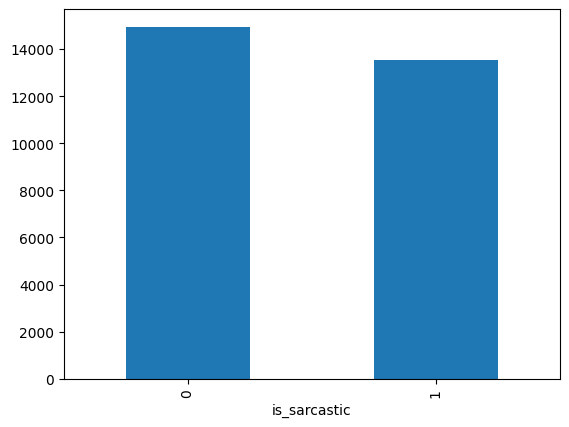

In [99]:
data['is_sarcastic'].value_counts().plot(kind='bar')

# Preprocessing

In [100]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [101]:
def preprocess_text(text):
    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)      
    
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)


In [102]:
data['text'] = data['text'].apply(preprocess_text)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = data['text']
y = data['is_sarcastic']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [106]:
num_words =  10000

In [107]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words,
                                                  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  oov_token= '<oov>')

In [108]:
tokenizer.fit_on_texts(X_train)

In [109]:
word_index = tokenizer.word_index

In [110]:
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])

In [111]:
vocab_size = len(word_index)
vocab_size

17800

In [112]:
X_train = tokenizer.texts_to_sequences(X_train)

In [113]:
X_test = tokenizer.texts_to_sequences(X_test)

In [114]:
max_len = max([len(s) for s in X_train])
max_len

106

In [115]:
X_train = tf.keras.utils.pad_sequences(X_train, padding='pre', maxlen=max_len)

X_test = tf.keras.utils.pad_sequences(X_test, padding='pre', maxlen=max_len)

## Modelling with Keras

In [116]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(max_len,)),
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=80), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=80, activation=tf.nn.tanh)),  
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=80, activation=tf.nn.elu),  
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])



In [117]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [118]:
lstm_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 106, 80)        │       800,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 160)            │       103,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 80)             │        12,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 916,001 (3.49 MB)

 Trainable params: 916,001 (3.49 MB)

 Non-trainable params: 0 (0.00 B)

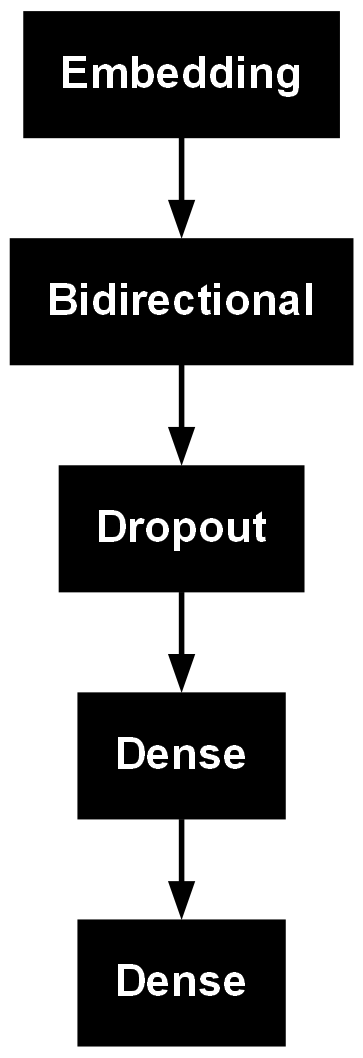

In [137]:
tf.keras.utils.plot_model(lstm_model)

In [119]:
h = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
713/713 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - acc: 0.6936 - loss: 0.5602 - val_acc: 0.7974 - val_loss: 0.4299
Epoch 2/5
713/713 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - acc: 0.8736 - loss: 0.3029 - val_acc: 0.8039 - val_loss: 0.4651
Epoch 3/5
713/713 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - acc: 0.9232 - loss: 0.1980 - val_acc: 0.7881 - val_loss: 0.5244
Epoch 4/5
713/713 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - acc: 0.9487 - loss: 0.1403 - val_acc: 0.7828 - val_loss: 0.6003
Epoch 5/5
713/713 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - acc: 0.9635 - loss: 0.1023 - val_acc: 0.7851 - val_loss: 0.6933


<Axes: title={'center': 'Model Accuracy and Loss Graph'}>

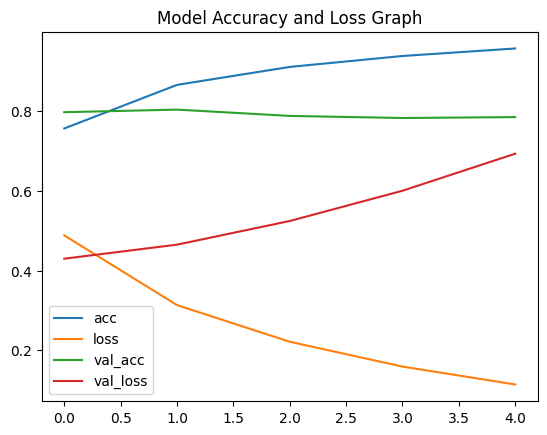

In [120]:
pd.DataFrame(h.history).plot(title='Model Accuracy and Loss Graph')

In [121]:
lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test)

print(f'LSTM Model Accuracy: {lstm_acc}')
print(f'LSTM Model Loss: {lstm_loss}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.7764 - loss: 0.7201
LSTM Model Accuracy: 0.7851254343986511
LSTM Model Loss: 0.6932697892189026


In [122]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(max_len,)),
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=80),  
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [123]:
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [124]:
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 106, 80)        │       800,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 104, 64)        │        15,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 52, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3328)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       332,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,148,425 (4.38 MB)

 Trainable params: 1,148,425 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

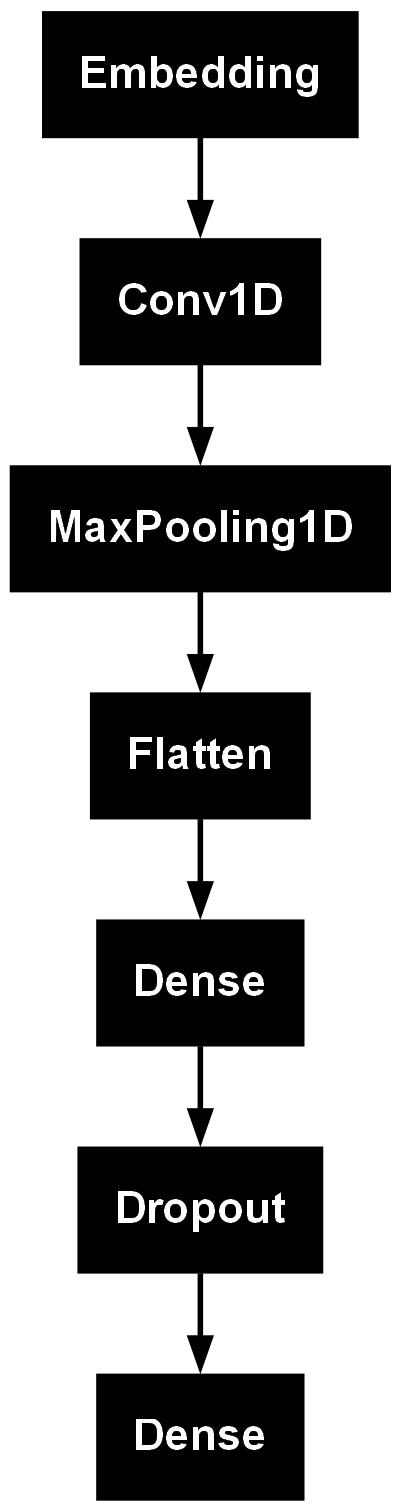

In [136]:
tf.keras.utils.plot_model(cnn_model)

In [125]:
h = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
713/713 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.6645 - loss: 0.5830 - val_acc: 0.8051 - val_loss: 0.4257
Epoch 2/5
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.8880 - loss: 0.2795 - val_acc: 0.7934 - val_loss: 0.4757
Epoch 3/5
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.9588 - loss: 0.1222 - val_acc: 0.7872 - val_loss: 0.6081
Epoch 4/5
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - acc: 0.9845 - loss: 0.0478 - val_acc: 0.7858 - val_loss: 0.8812
Epoch 5/5
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.9947 - loss: 0.0170 - val_acc: 0.7886 - val_loss: 1.1888


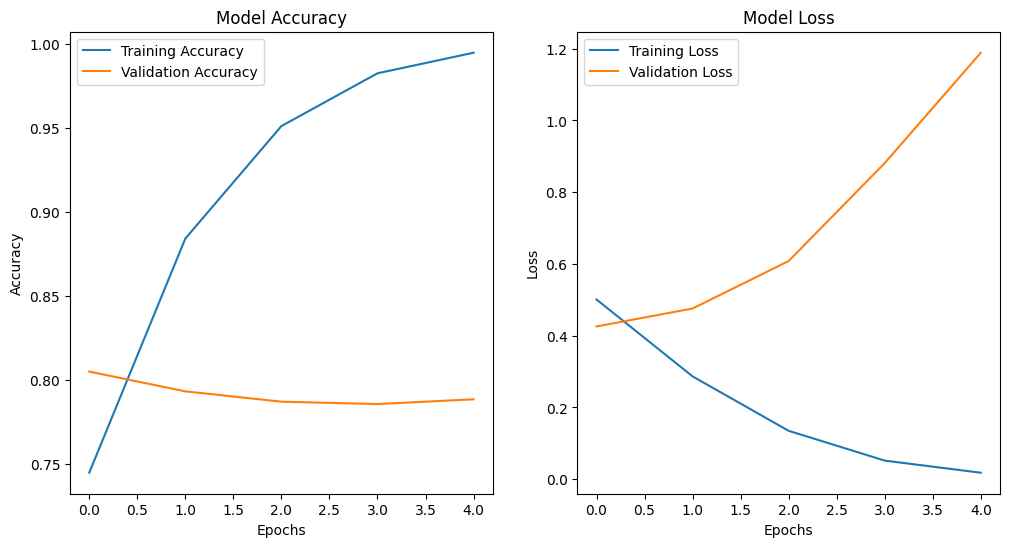

In [126]:
acc = h.history['acc']  
val_acc = h.history['val_acc'] 
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(5)  

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(epochs, acc, label='Training Accuracy')
axes[0].plot(epochs, val_acc, label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, label='Training Loss')
axes[1].plot(epochs, val_loss, label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.show()


In [127]:
cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test)
print(f'CNN Model Accuracy: {cnn_acc}')
print(f'CNN Model Loss: {cnn_loss}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7852 - loss: 1.2458
CNN Model Accuracy: 0.7886335849761963
CNN Model Loss: 1.188799500465393


In [128]:
print(f'LSTM Accuracy: {lstm_acc}, Loss: {lstm_loss}')
print(f'\nCNN Accuracy: {cnn_acc}, Loss: {cnn_loss}')

LSTM Accuracy: 0.7851254343986511, Loss: 0.6932697892189026

CNN Accuracy: 0.7886335849761963, Loss: 1.188799500465393


In [54]:
from tensorflow.keras.utils import plot_model

plot_model(lstm_model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


## Modelling with pytorch

In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [131]:
# Tokenizer and padding
max_len = max(len(seq) for seq in X_train)

x_train = pad_sequences(X_train, maxlen=max_len, padding="post")
x_test = pad_sequences(X_test, maxlen=max_len, padding="post")

In [132]:
# Convert to PyTorch tensors
x_train = torch.tensor(x_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.long)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

# DataLoader
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

In [133]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

torch.Size([22802, 106]) torch.Size([5701, 106]) torch.Size([22802]) torch.Size([5701])


In [134]:
class BiLSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size, dropout):
        super(BiLSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.bilstm = nn.LSTM(embed_size, hidden_size, bidirectional=True, batch_first=True, dropout=dropout)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.bilstm(x)
        x = self.dropout(x[:, -1, :])
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

In [135]:
vocab_size = len(tokenizer.word_index) + 1
embed_size = 128
hidden_size = 64
output_size = 1
dropout = 0.5

model = BiLSTMModel(vocab_size, embed_size, hidden_size, output_size, dropout)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0045)

c:\Users\user\.virtualenvs\nlp\Lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


In [61]:
torch.cuda.is_available()

True

In [62]:
# Training
num_epochs = 2
model.train()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/2, Loss: 0.6067992448806763
Epoch 2/2, Loss: 0.11076480895280838


In [63]:
# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs.squeeze() > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.39%


# Bart

# Prepare dataset

In [64]:
import datasets

In [67]:
dataset = datasets.load_dataset('csv', data_files='datasets/sarcastic_headline_pairs_cleaned_full.csv')

Generating train split: 29970 examples [00:00, 381117.71 examples/s]


In [57]:
dataset

DatasetDict({
    train: Dataset({
        features: ['non_sarcastic', 'sarcastic'],
        num_rows: 29970
    })
})

In [68]:
# Split the dataset into train and test sets
train_test_split = dataset['train'].train_test_split(test_size=0.2)
train = train_test_split
test = train_test_split

# Display the dataset
print(train)
print(test)


DatasetDict({
    train: Dataset({
        features: ['non_sarcastic', 'sarcastic'],
        num_rows: 23976
    })
    test: Dataset({
        features: ['non_sarcastic', 'sarcastic'],
        num_rows: 5994
    })
})
DatasetDict({
    train: Dataset({
        features: ['non_sarcastic', 'sarcastic'],
        num_rows: 23976
    })
    test: Dataset({
        features: ['non_sarcastic', 'sarcastic'],
        num_rows: 5994
    })
})


# Train a tokenizer

In [69]:
from tokenizers import normalizers, pre_tokenizers, Tokenizer, models, trainers

# Build a tokenizer
bpe_tokenizer = Tokenizer(models.BPE())
bpe_tokenizer.normalizer = normalizers.Lowercase()
bpe_tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

trainer = trainers.BpeTrainer(
    vocab_size=50265,
    special_tokens=["<s>", "<pad>", "</s>", "<unk>", "<mask>"],
    initial_alphabet=pre_tokenizers.ByteLevel.alphabet(),
)

# fine tuning bart

In [71]:
from transformers import AutoTokenizer

en_tokenizer = AutoTokenizer.from_pretrained( "facebook/bart-base" )


def tokenize_dataset(sample):
    input = en_tokenizer(sample['non_sarcastic'], padding='max_length', max_length=240, truncation=True)
    label = en_tokenizer(sample['sarcastic'], padding='max_length', max_length=240, truncation=True)

    input["decoder_input_ids"] = label["input_ids"]
    input["decoder_attention_mask"] = label["attention_mask"]
    input["labels"] = label["input_ids"]

    return input

In [72]:
train_tokenized = train.map(tokenize_dataset, batched=True)
test_tokenized = test.map(tokenize_dataset, batched=True)


Map: 100%|██████████| 23976/23976 [00:03<00:00, 6626.62 examples/s]


In [73]:
train_tokenized

DatasetDict({
    train: Dataset({
        features: ['non_sarcastic', 'sarcastic', 'input_ids', 'attention_mask', 'decoder_input_ids', 'decoder_attention_mask', 'labels'],
        num_rows: 23976
    })
    test: Dataset({
        features: ['non_sarcastic', 'sarcastic', 'input_ids', 'attention_mask', 'decoder_input_ids', 'decoder_attention_mask', 'labels'],
        num_rows: 5994
    })
})

In [ ]:
from transformers import BartForConditionalGeneration
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")

training_args = Seq2SeqTrainingArguments(
    output_dir="./bart",
    evaluation_strategy="steps",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    predict_with_generate=True,
    logging_steps=2,  # set to 1000 for full training
    save_steps=64,  # set to 500 for full training
    eval_steps=64,  # set to 8000 for full training
    warmup_steps=1,  # set to 2000 for full training
    max_steps=128, # delete for full training
    overwrite_output_dir=True,
    save_total_limit=3,
    fp16=False, # True if GPU
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized['train'],
    eval_dataset=test_tokenized['test'],
)


trainer.train()

In [117]:
trainer.save_model("./bart/sarcasm_model")

In [118]:
model = BartForConditionalGeneration.from_pretrained("./bart/sarcasm_model")

In [138]:
def generate_sarcastic(text):
    input_ids = en_tokenizer(
        text,
        return_tensors="pt",  
        padding="max_length",
        max_length=120,
        truncation=True
    )["input_ids"]

    output_ids = model.generate(
        input_ids=input_ids,
        max_length=25,  
        num_beams=3,  
        early_stopping=True,  
        no_repeat_ngram_size=1,
    )

    sarcastic_text = en_tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return sarcastic_text

In [156]:
text = "it was funny"
sarcastic_text = generate_sarcastic(text)
print(f"Non-sarcastic text: {text}\n")
print(f"Sarcastic text: {sarcastic_text}")

Non-sarcastic text: it was funny

Sarcastic text: it was like, "wow that is just so totally completely out of the right place at a time when we
